In [2]:
import pandas as pd
import numpy as np
import sklearn.datasets as dataset
import matplotlib.pyplot as plt
from timeit import timeit

C:\Program Files\Python37\Lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Program Files\Python37\Lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Program Files\Python37\Lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
iris=dataset.load_iris()
X=iris['data']
y=iris['target']

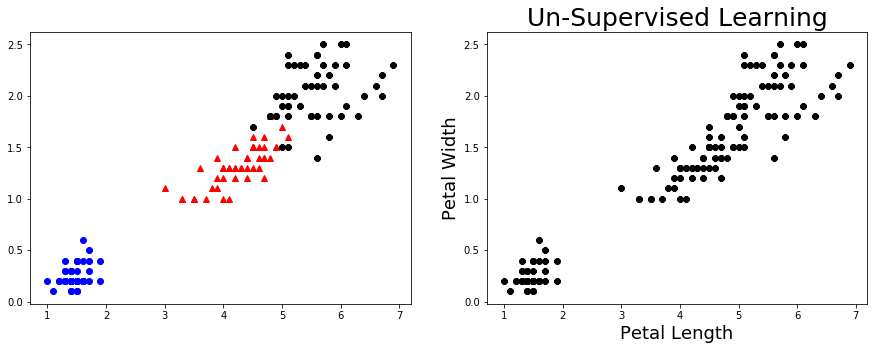

In [4]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
ax[0].plot(X[:,2][y==0],X[:,3][y==0],'bo')
ax[0].plot(X[:,2][y==1],X[:,3][y==1],'r^')
ax[0].plot(X[:,2][y==2],X[:,3][y==2],'k8')
ax[1].plot(X[:,2],X[:,3],'k8')
plt.xlabel("Petal Length", fontsize=18)
plt.ylabel("Petal Width", fontsize=18)
plt.title("Un-Supervised Learning", fontsize=25)
plt.show()

In [5]:
blob_center=np.array(
    [[0.2,2.3],
     [-1.5,2.3],
     [-2.8,1.8],
     [-2.8,2.8],
     [-2.8,1.3]])
blob_std=np.array([0.4,0.3,0.1,0.1,0.1])

X,y=dataset.make_blobs(n_samples=2000, centers=blob_center, cluster_std=blob_std, random_state=7)

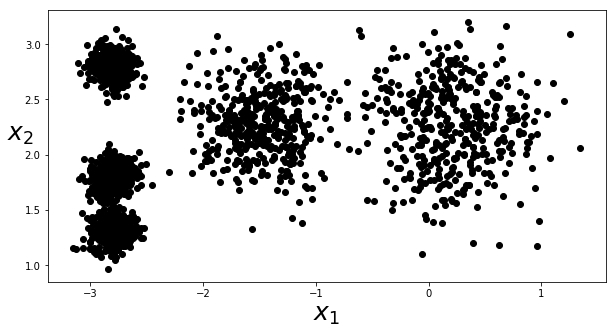

In [6]:
plt.figure(figsize=(10,5))
plt.plot(X[:,0],X[:,1],'ko')
plt.xlabel("$x_1$",fontsize=25)
plt.ylabel("$x_2$",fontsize=25, rotation=0)
plt.show()

In [7]:
from sklearn.cluster import KMeans
k=5
kmeans=KMeans(n_clusters=k)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:
kmeans.labels_

array([0, 4, 1, ..., 2, 1, 4])

In [9]:
centroids=kmeans.cluster_centers_

In [10]:
X_new=np.array([[0,2],[3,2],[-3,3],[-3,2.5]])
predict=kmeans.predict(X_new)
predict

array([1, 1, 2, 2])

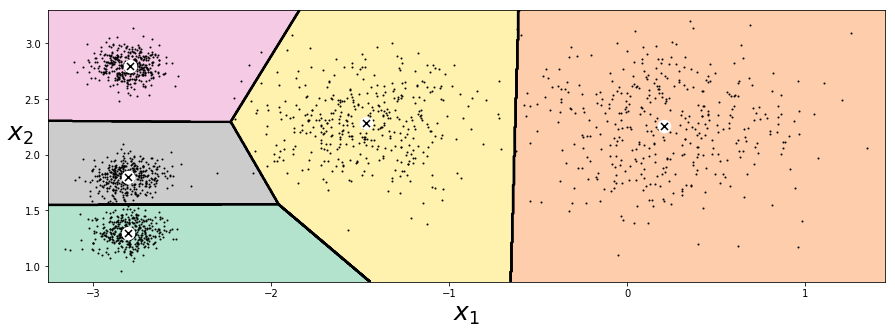

In [11]:
plt.figure(figsize=(15,5))
mins=X.min(axis=0)-0.1
maxs=X.max(axis=0)+0.1

X1=np.linspace(mins[0],maxs[0],1000)
X2=np.linspace(mins[1],maxs[1],1000)
x1,x2=np.meshgrid(X1,X2)
new_X=np.c_[x1.ravel(),x2.ravel()]
Z=kmeans.predict(new_X).reshape(x1.shape)

plt.contourf(Z, extent=(mins[0],maxs[0],mins[1],maxs[1]), cmap=plt.cm.Pastel2)
plt.contour(Z, extent=(mins[0],maxs[0],mins[1],maxs[1]), linewidths=2, colors='k')
plt.plot(X[:,0],X[:,1],'k.', markersize=2)
plt.scatter(centroids[:,0],centroids[:,1], s=30, marker='o', linewidths=8, color='white', zorder=10)
plt.scatter(centroids[:,0],centroids[:,1], s=50, marker='x', linewidths=11, color='k', zorder=11)
plt.xlabel("$x_1$",fontsize=25)
plt.ylabel("$x_2$",fontsize=25, rotation=0)
plt.show()

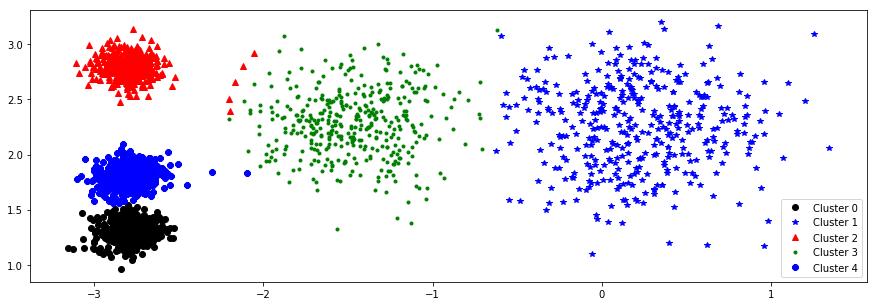

In [12]:
plt.figure(figsize=(15,5))
y=kmeans.labels_
plt.plot(X[:,0][y==0],X[:,1][y==0],'ko', label="Cluster 0")
plt.plot(X[:,0][y==1],X[:,1][y==1],'b*', label="Cluster 1")
plt.plot(X[:,0][y==2],X[:,1][y==2],'r^', label="Cluster 2")
plt.plot(X[:,0][y==3],X[:,1][y==3],'g.', label="Cluster 3")
plt.plot(X[:,0][y==4],X[:,1][y==4],'b8', label="Cluster 4")
plt.legend()
plt.show()

In [13]:
'''calcuating l2 norm that is disntance on new points from centroids'''
np.linalg.norm(np.tile(X_new,(1,k)).reshape(-1,k,2)-kmeans.cluster_centers_,axis=2)

'''above function same as below'''
import math
def mag(x): 
    return math.sqrt(sum(i**2 for i in x))

mag(range(1,4))

'''short form of above function'''
np.linalg.norm(np.array([1,2,3]))

3.7416573867739413

In [14]:
plt.figure(figsize=(10,5))
plt.plot(X[:,2],X[:,3],"bo",label="All instances")
plt.xlabel("Petal Length", fontsize=18)
plt.ylabel("Petal Width", fontsize=18)
plt.legend()
plt.show()

IndexError: index 2 is out of bounds for axis 1 with size 2

<Figure size 720x360 with 0 Axes>

In [15]:
k=3
kmeans=KMeans(n_clusters=k,n_init=25)
kmeans.fit(X[:,2:4])
predict=kmeans.predict(X[:,2:4])
predict

ValueError: Found array with 0 feature(s) (shape=(2000, 0)) while a minimum of 1 is required.

In [16]:
plt.figure(figsize=(10,5))
mins=X[:,2:4].min(axis=0)-0.1
maxs=X[:,2:4].max(axis=0)+0.1
x1=np.linspace(mins[0],maxs[0],100)
x2=np.linspace(mins[1],maxs[1],100)
X1,X2=np.meshgrid(x1,x2)
newX=np.c_[X1.ravel(),X2.ravel()]
Z=kmeans.predict(newX).reshape(X1.shape)
plt.plot(X[:,2][y==0],X[:,3][y==0],"bo",label="0 instances")
plt.plot(X[:,2][y==1],X[:,3][y==1],"r^",label="1 instances")
plt.plot(X[:,2][y==2],X[:,3][y==2],"g.",label="2 instances")
plt.contourf(Z, extent=(mins[0],maxs[0],mins[1],maxs[1]), cmap=plt.cm.Pastel2)
plt.contour(Z, extent=(mins[0],maxs[0],mins[1],maxs[1]), colors='k', linewidth=2)
plt.xlim(mins[0],maxs[0])
plt.ylim(mins[1],maxs[1])
plt.xlabel("Petal Length", fontsize=18)
plt.ylabel("Petal Width", fontsize=18)
plt.legend()
plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

<Figure size 720x360 with 0 Axes>

In [17]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.model_selection import train_test_split

mnist=dataset.fetch_openml('mnist_784', version=1)
X=mnist['data']
y=mnist['target'].astype('int64')

X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=42)

In [18]:
filename='my_memmap.data'
X_mm=np.memmap(filename,dtype='float32',mode='write',shape=X_train.shape)
X_mm=np.copy(X_train)

In [19]:
minibatch_kmeans=MiniBatchKMeans(n_clusters=10, batch_size=10, random_state=42)
minibatch_kmeans.fit(X_mm)

MiniBatchKMeans(batch_size=10, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=10,
        n_init=3, random_state=42, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [20]:
inertia=[]
for i in range(1,20):
    kmeans=KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(1,20),np.array(inertia),'bo-', linewidth=3)
plt.xticks(np.arange(1,20))
plt.xlabel("Number of Clusters $k$", fontsize=18)
plt.ylabel("Inertia", fontsize=18)
plt.annotate("Elbow",
             xy=(4,inertia[3]),
             xytext=(0.55,0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(X,kmeans.labels_)

In [ ]:
silhouette=[]
for i in range(2,10):
    kmeans=KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    silhouette.append(silhouette_score(X,kmeans.labels_))

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(2,10),np.array(silhouette),'bo-',linewidth=2,label="Silhouette Score")
plt.xlabel("Number of Clusters $K$", fontsize=18)
plt.ylabel("Silhouette Score", fontsize=18)
plt.annotate("Optimal Number of Clusters", xy=(4,0.68), xytext=(4,0.58), fontsize=16, arrowprops=dict(facecolor='black',shrink=0.1))
plt.grid()
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(15,9))
for k in (3,4,5,6):
    plt.subplot(2,2,k-2)
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(X)
    silhouette_coeff=silhouette_samples(X,kmeans.labels_)
    padding=len(X) // 30
    pos=padding
    ticks=[]
    for i in range(0,k):
        coeff=silhouette_coeff[kmeans.labels_==i]
        coeff.sort()
        color=plt.cm.Spectral(i/k)
        plt.fill_betweenx(np.arange(pos, pos+len(coeff)),coeff,0, facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeff) // 2)
        pos+=len(coeff)+padding
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    plt.title(f"$k=${k}",fontsize=18)
    if k in (5,6):
        plt.xlabel("Silhouette Coefficients", fontsize=15)
    if k in (3,5):
        plt.ylabel("Number of Clusters", fontsize=18, rotation=90)
    plt.axvline(silhouette_score(X,kmeans.labels_),color='red',linestyle='--')
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
x=np.linspace(0,5,100)
y=np.linspace(0,20,100)
x1=np.linspace(0,10,100)
plt.fill_betweenx(y,0,x,facecolor='b',alpha=0.4)
plt.fill_betweenx(y+20,0,x1, facecolor='g', alpha=0.4)
plt.show()

In [ ]:
from matplotlib.image import imread
import os
image=imread(os.path.join("image","ladybug.png"))

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(image)
plt.axis("off")
plt.show()

In [ ]:
X=image.reshape(-1,3)
kmeans_per_k=[KMeans(n_clusters=k, random_state=42) for k in range(2,11)]

In [ ]:
from timeit import timeit
plt.figure(figsize=(15,5))
model_fit=[model.fit(image) for model in kmeans_per_k]

In [ ]:
inertia=[model.inertia_ for model in model_fit ]

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(2, 11),inertia, "bo-", linewidth=2)
plt.show()

In [ ]:
import math
plt.figure(figsize=(45,45))
for i,k in enumerate((4,6,8,10)):
    plt.subplot(2,2,i+1)
    new_image=model_fit[k-2]
    segmented_image=new_image.cluster_centers_[new_image.labels_]
    segmented_image=segmented_image.reshape(image.shape)
    print(segmented_image.shape, image.shape, X.shape)
    plt.imshow(segmented_image)
    plt.axis('off')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
#silhouette=silhouette_score(X,model_fit[2].labels_)

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(2,11),silhouette, "bo-", linewidth=2)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_digits, y_digits=dataset.load_digits(return_X_y=True)

X_train,X_test,y_train,y_test=train_test_split(X_digits, y_digits, random_state=42)
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)
y_predict=log_reg.predict(X_test)
accuracy_score(y_test,y_predict)

In [ ]:
plt.figure(figsize=(8,2))
plt.imshow(X_digits[0].reshape(8,8),interpolation="bilinear", cmap='binary')
plt.axis("off")
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
pipeline=Pipeline([('kmeans',KMeans(n_clusters=50, random_state=42)),
                   ('log_reg',LogisticRegression())])
pipeline.fit(X_train,y_train)
y_predict=pipeline.predict(X_test)
accuracy_score(y_test,y_predict)

In [ ]:
kmeans=KMeans(n_clusters=50, random_state=42)
kmeans.fit(X_train)
newX=kmeans.transform(X_train)
newlog_reg=LogisticRegression()
newlog_reg.fit(newX,y_train)
kmeans.fit(X_test)
newXtest=kmeans.transform(X_test)
y_predict=newlog_reg.predict(newXtest)
accuracy_score(y_test,y_predict)

In [ ]:
from sklearn.model_selection import GridSearchCV
kmeans=KMeans(random_state=42)
param_grid={'kmeans__n_clusters':np.arange(1,100)}
grid_search=GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_search.fit(X_train,y_train)
y_predict=grid_search.predict(X_test)
accuracy_score(y_test,y_predict)

In [ ]:
grid_search.best_params_

In [ ]:
n_label=50
log_reg=LogisticRegression(random_state=42)
log_reg.fit(X_train[:n_label],y_train[:50])
accuracy_score(y_test,log_reg.predict(X_test))

In [ ]:
k=50
kmeans=KMeans(n_clusters=50)
X_digit_distance=kmeans.fit_transform(X_train)
representative_digit_id=np.argmin(X_digit_distance,axis=0)
representative_digits=X_train[representative_digit_id]

In [ ]:
plt.figure(figsize=(8,2))
for i in range(len(representative_digits)):
    plt.subplot(5,10,i+1)
    image=representative_digits[i].reshape(8,8)
    plt.imshow(image, interpolation='nearest', cmap='binary')
    plt.axis("off")
plt.show()

In [ ]:
y_representative_digits=np.array([3,0,7,1,1,4,6,5,5,2,3,9,5,8,2,1,9,6,7,9,7,9,4,6,2,1,0,8,7,5,0,2,3,6,4,1,9,4,3,3,7,1,2,3,8,8,7,4,2,8])
y_representative_digits.shape

In [ ]:
log_reg.fit(representative_digits,y_representative_digits)
accuracy_score(y_test,log_reg.predict(X_test))

In [ ]:
kmeans=KMeans(n_clusters=50, random_state=42)
instance_distance=kmeans.fit_transform(X_train)
closest_cluster_instance=np.argmin(instance_distance,axis=0)
new_y_train=np.empty(len(y_train)).astype(np.int32)
for i in range(k):    
    new_y_train[kmeans.labels_==i]=y_train[closest_cluster_instance[i]]

In [ ]:
log_reg.fit(X_train,new_y_train)
accuracy_score(y_test,log_reg.predict(X_test))

In [ ]:
a1=np.array([[1/3,2/3]])
a2=np.array([[1/4,3/4]])
np.multiply(a1,a2)

In [ ]:
np.random.seed(42)
X,y=dataset.make_moons(n_samples=1000, noise=0.05)

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(X[:,0],X[:,1],"b.")
plt.xlabel("$X_1$",fontsize=18)
plt.ylabel("$X_2$",fontsize=18,rotation=0)
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.05,min_samples=5)
dbscan.fit(X)

In [ ]:
dbscan.labels_
'''labels that are marked with -1 label is considered as anomalies'''

In [ ]:
len(dbscan.core_sample_indices_)

In [ ]:
dbscan.components_

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(121)
updated_labels=np.copy(dbscan.labels_)
anomalies=X[updated_labels==-1]
core_instances=X[updated_labels!=-1]
updated_labels=updated_labels[dbscan.labels_!=-1]
plt.scatter(core_instances[:,0],core_instances[:,1],c=updated_labels)
plt.scatter(anomalies[:,0],anomalies[:,1],marker="x", color='red', s=100)
plt.title("$\epsilon$=0.05 and min_samples=5", fontsize=18)
plt.xlabel("$X_1$",fontsize=18)
plt.ylabel("$X_2$",fontsize=18,rotation=0)

plt.subplot(122)
dbscan2=DBSCAN(eps=0.20, min_samples=5)
dbscan2.fit(X)
updated_labels=np.copy(dbscan2.labels_)
anomalies=X[updated_labels==-1]
core_instances=X[updated_labels!=-1]
updated_labels=updated_labels[dbscan2.labels_!=-1]
plt.scatter(core_instances[:,0][dbscan2.labels_==0],core_instances[:,1][dbscan2.labels_==0],c='yellow', label="Cluster 0")
plt.scatter(core_instances[:,0][dbscan2.labels_==1],core_instances[:,1][dbscan2.labels_==1],c='red', label="cluster 1")
plt.scatter(anomalies[:,0],anomalies[:,1],marker="x", color='red', s=100)
plt.title("$\epsilon$=0.20 and min_samples=5", fontsize=18)
plt.xlabel("$X_1$",fontsize=18)
plt.ylabel("$X_2$",fontsize=18,rotation=0)
plt.legend()
plt.show()

In [ ]:
dbscan=dbscan2

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_,dbscan.labels_[dbscan.core_sample_indices_])

In [ ]:
new_X=np.array([[-0.5,0.25],[0.5,-.025],[1.0,-0.75],[2.0,-0.50],[1.5,0.50],[0.5,-0.5]])
pp=knn.predict(new_X)   

In [ ]:
plt.figure(figsize=(15,5))
mins=X.min(axis=0)-0.1
maxs=X.max(axis=0)+0.1
x1=np.linspace(mins[0],maxs[0],100)
x2=np.linspace(mins[1],maxs[1],100)
X1,X2=np.meshgrid(x1,x2)
Y=np.c_[X1.ravel(),X2.ravel()]
Z=knn.predict(Y).reshape(X1.shape)
plt.scatter(X[:,0],X[:,1],c='k',marker='.', zorder=10)
plt.contourf(Z, extent=(mins[0],maxs[0],mins[1],maxs[1]), cmap=plt.cm.Pastel1)
plt.contour(Z, extent=(mins[0],maxs[0],mins[1],maxs[1]), colors='k', linewidths=2)
plt.scatter(new_X[1:3,0],new_X[1:3,1],c='k',marker='x',s=100)
plt.show()

In [ ]:
y_dist, y_dist_id=knn.kneighbors(new_X, n_neighbors=1)
pp[y_dist.ravel()>.20]=-1
pp

In [21]:
X1, y1 = dataset.make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = dataset.make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

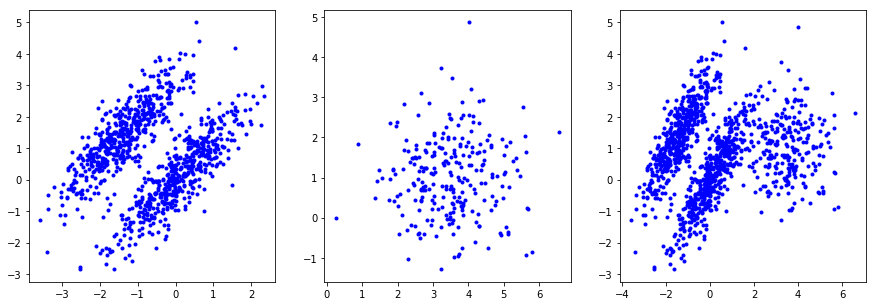

In [22]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.plot(X1[:,0],X1[:,1],"b.")
plt.subplot(132)
plt.plot(X2[:,0],X2[:,1],"b.")
plt.subplot(133)
plt.plot(X[:,0],X[:,1],"b.")
plt.show()

In [23]:
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=3, n_init=10, random_state=42)
gmm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=10, precisions_init=None,
        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [24]:
gmm.weights_

array([0.20965228, 0.4000662 , 0.39028152])

In [25]:
gmm.means_

array([[ 3.39909717,  1.05933727],
       [-1.40763984,  1.42710194],
       [ 0.05135313,  0.07524095]])

In [26]:
gmm.covariances_

array([[[ 1.14807234, -0.03270354],
        [-0.03270354,  0.95496237]],

       [[ 0.63478101,  0.72969804],
        [ 0.72969804,  1.1609872 ]],

       [[ 0.68809572,  0.79608475],
        [ 0.79608475,  1.21234145]]])

In [27]:
gmm.converged_

True

In [28]:
gmm.n_iter_

4

In [29]:
gmm.score_samples(X)

array([-2.60782346, -3.57106041, -3.33003479, ..., -3.51352783,
       -4.39802535, -3.80743859])

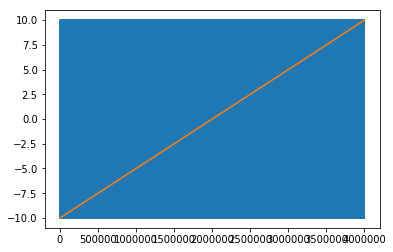

In [30]:
resolution=100
grid=np.arange(-10,10,1/resolution)
x1,x2=np.meshgrid(grid,grid)
x=np.vstack([x1.ravel(),x2.ravel()]).T
plt.plot(x)
plt.show()

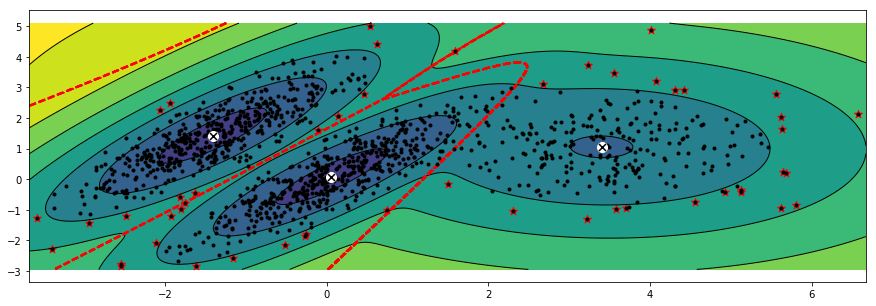

In [34]:
from matplotlib.colors import LogNorm
plt.figure(figsize=(15,5))
mins=X.min(axis=0)-0.1
maxs=X.max(axis=0)+0.1
x1=np.linspace(mins[0],maxs[0],1000)
x2=np.linspace(mins[1],maxs[1],1000)
xx,yy=np.meshgrid(x1,x2)
XX=np.c_[xx.ravel(),yy.ravel()]
Z=-gmm.score_samples(XX)
Z=Z.reshape(xx.shape)

plt.contourf(xx,yy,Z, norm=LogNorm(vmin=1.0,vmax=30.0), levels=np.logspace(0,2,12))
plt.contour(xx,yy,Z, norm=LogNorm(vmin=1.0,vmax=30.0), levels=np.logspace(0,2,12), linewidths=1, colors='k')
plt.plot(X[:,0],X[:,1],"k.")

Z=gmm.predict(XX).reshape(xx.shape)
plt.contour(xx,yy,Z,linewidths=2,colors='r',linestyles='dashed')

plt.scatter(anomalies[:,0],anomalies[:,1],marker='*', c='r',s=70)
plt.scatter(gmm.means_[:,0],gmm.means_[:,1],marker='x', s=50, c='k', zorder=11, linewidths=3)
plt.scatter(gmm.means_[:,0],gmm.means_[:,1],marker='o', s=100, c='w', zorder=10)

plt.show()

In [33]:
densities=gmm.score_samples(X)
density_threshold=np.percentile(densities,4)
anomalies=X[densities<density_threshold]

In [36]:
from sklearn.mixture import BayesianGaussianMixture
bgm=BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
            degrees_of_freedom_prior=None, init_params='kmeans',
            max_iter=100, mean_precision_prior=None, mean_prior=None,
            n_components=10, n_init=10, random_state=42, reg_covar=1e-06,
            tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
            weight_concentration_prior=None,
            weight_concentration_prior_type='dirichlet_process')

In [39]:
np.round(bgm.weights_,2)

array([0.4 , 0.21, 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

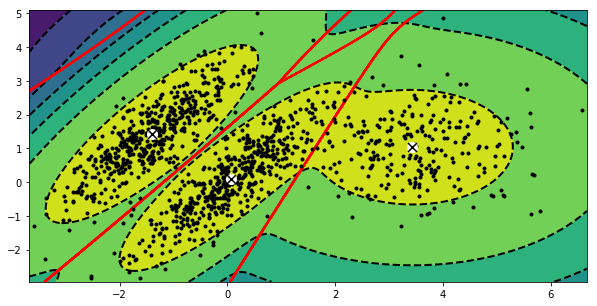

In [60]:
from matplotlib.colors import LogNorm
plt.figure(figsize=(10,5))
mins=X.min(axis=0)-0.1
maxs=X.max(axis=0)+0.1
x1=np.linspace(mins[0],maxs[0],1000)
x2=np.linspace(mins[1],maxs[1],1000)
xx,yy=np.meshgrid(x1,x2)
zz=np.c_[xx.ravel(),yy.ravel()]
Z=bgm.score_samples(zz).reshape(xx.shape)
plt.contourf(xx,yy,Z)
plt.contour(xx,yy,Z,linewidths=2,colors='k')
plt.plot(X[:,0],X[:,1],'k.')
Z=bgm.predict(zz).reshape(xx.shape)
plt.contour(xx,yy,Z,linewidths=2, colors='r')
plt.scatter(bgm.means_[np.round(bgm.weights_,2)!=0][:,0],bgm.means_[np.round(bgm.weights_,2)!=0][:,1],s=100, c='w', marker='o', zorder=10)
plt.scatter(bgm.means_[np.round(bgm.weights_,2)!=0][:,0],bgm.means_[np.round(bgm.weights_,2)!=0][:,1],s=80, c='k',marker='x',linewidths=2,zorder=11)
plt.show()

In [63]:
gmm.bic(X),gmm.aic(X)

(8189.74345832983, 8102.518178214792)

In [79]:
#Lets compute BIC manually
n_clusters=3
n_dims=2
n_param_for_weight=n_clusters-1
n_param_for_means=n_clusters * n_dims
n_param_for_covariance=n_clusters * n_dims * (n_dims+1) // 2

n_params=n_param_for_weight+n_param_for_means+n_param_for_covariance

max_log_likelihood=gmm.score(X) * len(X)

bic=np.log(len(X)) * n_params- 2 * max_log_likelihood
aic=2* n_params - 2 * max_log_likelihood
aic,bic

(8102.518178214792, 8189.74345832983)

There's one weight per cluster, but the sum must be equal to 1, 
so we have one degree of freedom less, hence the -1. Similarly, the degrees of freedom for an $\times$ covariance matrix is not $n^2$, but $1 + 2 + \dots + n = \dfrac{n (n+1)}{2}$.

In [80]:
sum(gmm.weights_), gmm.covariances_

(0.9999999999999996, array([[[ 1.14807234, -0.03270354],
         [-0.03270354,  0.95496237]],
 
        [[ 0.63478101,  0.72969804],
         [ 0.72969804,  1.1609872 ]],
 
        [[ 0.68809572,  0.79608475],
         [ 0.79608475,  1.21234145]]]))